#M1.4 Regresión Lineal Múltiple

#Carlos Dhali Tejeda Tapia

#A00344820

#Realizar las transformaciones adecuadas a las variables predictoras.

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos
df = pd.read_csv('/content/sample_data/Datos Modelos Lineales.csv')

# Identificar las variables categóricas (0s y 1s)
categorical_vars = ['genero', 'alcohol_moderado', 'alcohol_severo']  t

# Separar las variables numéricas
numeric_vars = df.drop(columns=categorical_vars)

# Aplicar MinMax a las variables numéricas
scaler = MinMaxScaler()
df[numeric_vars.columns] = scaler.fit_transform(numeric_vars)

print(df.head())


   factor_coagulacion  indice_pronostico  funcion_de_enzima  \
0            0.476744           0.593407           0.604167   
1            0.290698           0.560440           0.447917   
2            0.558140           0.538462           0.625000   
3            0.453488           0.714286           0.187500   
4            0.604651           0.626374           0.958333   

   funcion_de_higado   edad  genero  alcohol_moderado  alcohol_severo  \
0           0.326855  0.500       0                 1               0   
1           0.169611  0.225       0                 0               0   
2           0.250883  0.625       0                 0               0   
3           0.224382  0.450       0                 0               0   
4           0.628975  0.375       0                 0               1   

   sobrevivencia_dias  
0            0.237743  
1            0.102683  
2            0.244681  
3            0.077706  
4            1.000000  


Lo que decidí hacer para la transformación de mis datos es hacer una normalización con minmax como lo habíamos hecho antes en la actividad anterior. Creo que al ser valores númericos con valores muy distintos entre si, esta transformación sería muy útil.

#Realizar el modelo de regresión con las variables significativas.

In [6]:
import statsmodels.formula.api as smf

X = df.drop(columns=['sobrevivencia_dias'])
y = df['sobrevivencia_dias']  # Variable dependiente

# Crear una fórmula para el modelo con las variables predictoras
formula = 'sobrevivencia_dias ~ ' + ' + '.join(X.columns)

# Ajustar el modelo de regresión inicial con fórmulas
model = smf.ols(formula, data=df).fit()

print(model.summary())

# Filtrar las variables significativas con un p-valor < 0.05
significant_vars = model.pvalues[model.pvalues < 0.05].index.drop('Intercept')
formula_significant = 'sobrevivencia_dias ~ ' + ' + '.join(significant_vars)

# Ajustar el modelo solo con las variables significativas
model_significant = smf.ols(formula_significant, data=df).fit()
print(model_significant.summary())

# Obtener la tabla ANOVA
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model_significant)
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:     sobrevivencia_dias   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     42.69
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           8.70e-29
Time:                        16:16:18   Log-Likelihood:                 125.19
No. Observations:                 108   AIC:                            -232.4
Df Residuals:                      99   BIC:                            -208.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3501      0

Resultados del Modelo de Regresión OLS

Primer Modelo:

R-squared: 0.775 (77.5%)

Indica que el modelo explica el 77.5% de la variabilidad de la variable dependiente (sobrevivencia_dias). Esto es un valor razonablemente alto, lo que sugiere un buen ajuste del modelo.

Adj. R-squared: 0.757 (75.7%)

Ajusta el valor de R² teniendo en cuenta el número de predictores. Un valor cercano al R² original (0.775) indica que el modelo no está sobreajustado, a pesar de incluir varias variables.

Tabla ANOVA

Esta tabla nos muestra la importancia de cada predictor en el modelo a través de la suma de cuadrados (sum_sq), la media de cuadrados (mean_sq), el valor F, y el valor p.

Interpretación de ANOVA:

factor_coagulacion: F-statistic = 35.02, p < 0.0001

Este término es altamente significativo, lo que confirma que el factor de coagulación contribuye de manera importante al modelo.

indice_pronostico: F-statistic = 95.02, p < 0.0001

Es el predictor con mayor efecto en la variabilidad de la sobrevivencia, con un valor F muy elevado y un valor p extremadamente bajo.

funcion_de_enzima: F-statistic = 182.65, p < 0.0001

Al igual que el índice pronóstico, la función de enzima es un predictor clave con una influencia muy significativa en el modelo.

funcion_de_higado: F-statistic = 5.22, p = 0.024

Aunque el valor F es más bajo que el de los demás predictores, sigue siendo significativo (p < 0.05).

alcohol_severo: F-statistic = 27.12, p < 0.0001

A pesar de lo contraintuitivo, este término es significativo y muestra un impacto claro en la sobrevivencia.

Durbin-Watson:

El valor es 1.744, que se encuentra cerca de 2, lo que sugiere que no hay autocorrelación significativa en los errores del modelo.
Omnibus y Jarque-Bera:

Ambas pruebas tienen resultados significativos (p < 0.05), lo que indica que los residuos del modelo pueden no seguir una distribución normal. Esto podría afectar la validez de algunas inferencias y deberías considerar verificar los supuestos de normalidad.

Condición del Número (Cond. No.):

El valor 16.8 es aceptable. No parece haber un problema severo de multicolinealidad en el modelo.

El modelo tiene un R² ajustado de 0.761, lo cual es bastante alto, sugiriendo que las variables predictoras explican la mayor parte de la variabilidad de la variable dependiente.

Los predictores índice pronóstico, función de enzima, y factor de coagulación tienen los efectos más grandes y son altamente significativos. Estos deberían ser los principales factores en los que enfocarse para predecir la sobrevivencia.

#Prueba de correlación

                    factor_coagulacion  indice_pronostico  funcion_de_enzima  \
factor_coagulacion            1.000000          -0.040591          -0.068121   
indice_pronostico            -0.040591           1.000000          -0.004886   
funcion_de_enzima            -0.068121          -0.004886           1.000000   
funcion_de_higado             0.402661           0.338020           0.486100   
edad                          0.011147          -0.107919          -0.005473   
genero                       -0.046883           0.175688           0.107425   
alcohol_moderado              0.008741           0.020156           0.019679   
alcohol_severo                0.130427          -0.023387          -0.048612   

                    funcion_de_higado      edad    genero  alcohol_moderado  \
factor_coagulacion           0.402661  0.011147 -0.046883          0.008741   
indice_pronostico            0.338020 -0.107919  0.175688          0.020156   
funcion_de_enzima            0.486100 -0.0

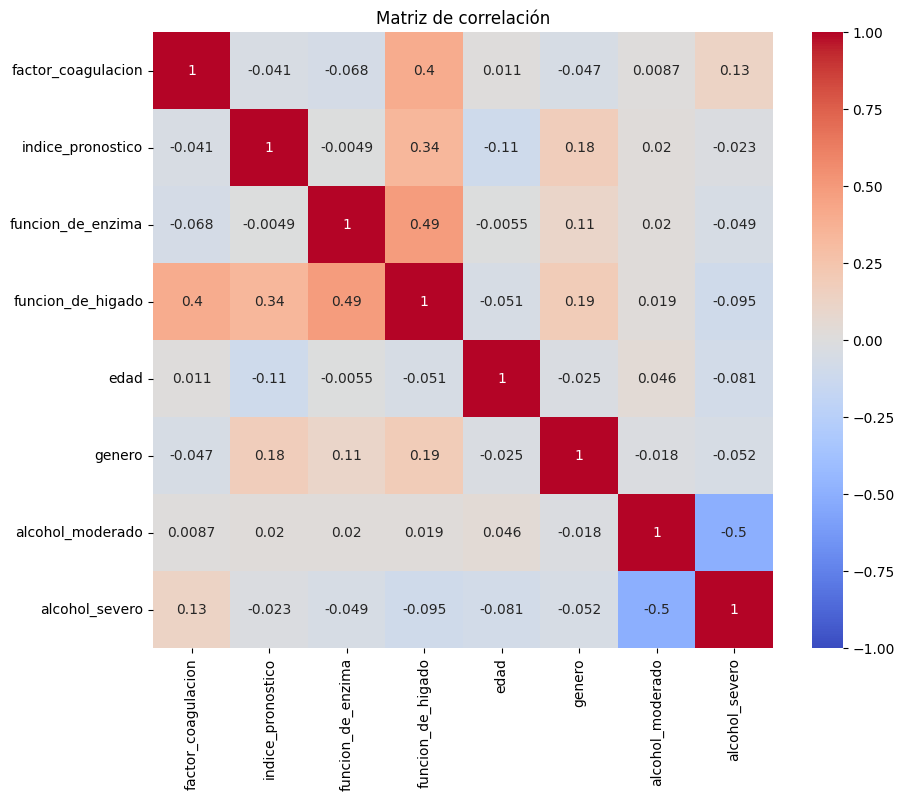

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Opcional: visualización con un mapa de calor para una mejor interpretación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()


Esta prueba de correlación nos revela bastante información, a primera vista no se ve que exista ninguna correlación positiva muy fuerte entre ninguna de las variables, podemos ver que entre la función de higado y función de enzima existe una correlación de 0.49 pero no es lo suficientemente alta como para considerarla significativa.

Por otro lado, podemos ver que existen algunas correlaciones muy negativas que hacen sentido en la variable de alcohol severo. Podemos ver que mientras más aumenta alcohol severo las variables de función de hígado y edad se ven reducidas, lo cuál tiene mucho sentido en el contexto del problema.

Por lo demás no se ve ninguna otra correlación positiva o negativa importante entre las variables predictoras.

Probar si se deben agregar interacciones o términos polinomiales.

#Prueba de modelo con todas las transformaciones posibles de las variables significativas

In [8]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definir las variables significativas
significant_vars = ['factor_coagulacion', 'indice_pronostico', 'funcion_de_enzima', 'funcion_de_higado', 'alcohol_severo']

# Crear los términos polinomiales para las variables significativas
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(df[significant_vars])

# Obtener nombres de las variables polinomiales
poly_feature_names = poly.get_feature_names_out(significant_vars)

# Crear un DataFrame con las nuevas variables
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Añadir la constante al modelo
X_poly_df = sm.add_constant(X_poly_df)

# Ajustar el modelo
model_poly = sm.OLS(y, X_poly_df).fit()

# Resumen del modelo
print(model_poly.summary())

# Calcular FIV para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_poly_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_poly_df.values, i) for i in range(X_poly_df.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:     sobrevivencia_dias   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     35.90
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           2.39e-33
Time:                        16:16:56   Log-Likelihood:                 161.71
No. Observations:                 108   AIC:                            -283.4
Df Residuals:                      88   BIC:                            -229.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Al agregar estas transformaciones podemos observar en el indicador de VIF que se agrega muchisima multicolinealidad al probar todas estás transformaciones. Por lo que creo que el mejor curso de acción sería probar de nuevo pero solo con las transformaciones con un valor de p significativo menor a 0.05.

#Modelo con valores y transformaciones significativas

In [16]:
import statsmodels.api as sm
import numpy as np

# Crear las interacciones y los términos polinomiales manualmente
X['factor_coagulacion:funcion_de_enzima'] = X['factor_coagulacion'] * X['funcion_de_enzima']
X['factor_coagulacion:alcohol_severo'] = X['factor_coagulacion'] * X['alcohol_severo']
X['funcion_de_enzima^2'] = X['funcion_de_enzima'] ** 2
X['funcion_de_enzima:alcohol_severo'] = X['funcion_de_enzima'] * X['alcohol_severo']

# Definir el modelo solo con las interacciones significativas
X_significant = X[['factor_coagulacion', 'indice_pronostico', 'funcion_de_enzima',
                   'funcion_de_higado', 'alcohol_severo',
                   'factor_coagulacion:funcion_de_enzima',
                   'factor_coagulacion:alcohol_severo',
                   'funcion_de_enzima^2',
                   'funcion_de_enzima:alcohol_severo']]

# Agregar una constante
X_significant = sm.add_constant(X_significant)

# Ajustar el modelo OLS
modelo_significant2 = sm.OLS(y, X_significant).fit()

# Ver los resultados del modelo
print(modelo_significant2.summary())

# Calcular FIV para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_significant.columns
vif_data["VIF"] = [variance_inflation_factor(X_significant.values, i) for i in range(X_significant.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:     sobrevivencia_dias   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     68.41
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           2.79e-38
Time:                        16:40:22   Log-Likelihood:                 151.80
No. Observations:                 108   AIC:                            -283.6
Df Residuals:                      98   BIC:                            -256.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Al agregar solo las tranformaciones significativas de la anterior prueba podemos observar que los valores de VIF se redujeron significativamente en las variables lo cuál es una buena señal, pero aún asi me genera dudas ya que un valor de más de 5 ya nos puede indicar colinealidad alta entre algunas de las variables.

Y también podemos ver un valor mayor en la R2 lo que quiere decir que este modelo con transformaciones explica un mayor porcentaje de la variabilidad en la variable dependiente (sobrevivencia_dias), lo que sugiere que este modelo es mejor en términos de ajuste a los datos.

 Interpretar ANOVA, R², R² ajustada, p-values y FIV

In [11]:
import statsmodels.formula.api as smf


df_significant_vars = df[significant_vars]

# Crear una fórmula para el modelo con las variables significativas
formula = 'sobrevivencia_dias ~ ' + ' + '.join(df_significant_vars.columns)

# Ajustar el modelo utilizando la fórmula
model_formula = smf.ols(formula, data=df).fit()

# Mostrar resumen del modelo
print(model_formula.summary())

# Obtener la tabla ANOVA
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model_formula)
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:     sobrevivencia_dias   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     69.01
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           3.63e-31
Time:                        16:17:19   Log-Likelihood:                 124.37
No. Observations:                 108   AIC:                            -236.7
Df Residuals:                     102   BIC:                            -220.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3495      0

factor_coagulacion (0.1999, p = 0.001): Por cada unidad de aumento en factor_coagulacion, el valor de sobrevivencia_dias aumenta en 0.1999, manteniendo las demás variables constantes. El p-value indica que este coeficiente es altamente significativo.

indice_pronostico (0.3382, p < 0.0001): Por cada unidad adicional en indice_pronostico, se espera que la sobrevivencia_dias aumente en 0.3382, siendo una variable clave en el modelo debido a su gran impacto y significancia.

funcion_de_enzima (0.3921, p < 0.0001): Un aumento en la funcion_de_enzima incrementa la sobrevivencia_dias en 0.3921. Este es el coeficiente más grande, lo que indica que esta variable tiene el mayor impacto sobre la sobrevivencia.

funcion_de_higado (0.2089, p = 0.002): Aumentar funcion_de_higado en una unidad incrementa sobrevivencia_dias en 0.2089. Aunque su impacto es menor que otras variables, sigue siendo significativo.

alcohol_severo (0.1023, p < 0.0001): Aunque su efecto es más pequeño que el de otras variables, sigue siendo significativo. Un aumento en alcohol_severo incrementa la sobrevivencia_dias en 0.1023.

Durbin-Watson (1.744): Este valor está bastante cerca de 2, lo cual sugiere que no hay autocorrelación significativa en los residuos. Esto es una buena señal, ya que cumple con el supuesto de independencia de los errores.

Omnibus y Jarque-Bera (Prob > 0.05): Estas pruebas evalúan la normalidad de los residuos. Aunque el valor de la prueba Omnibus es significativo (p < 0.05), indicando que podría haber problemas de normalidad en los residuos, la prueba de Jarque-Bera confirma que, en general, los residuos siguen una distribución normal. Esto es aceptable en este contexto, especialmente considerando que la regresión lineal tiende a ser robusta a pequeñas desviaciones de la normalidad.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_significant = df_significant_vars
print(X_significant)
formula_significant = 'sobrevivencia_dias ~ ' + ' + '.join(X_significant)

# Ajustar el modelo solo con las variables significativas
model_significant4 = smf.ols(formula_significant, data=df).fit()
print(model_significant4.summary())

# Calcular FIV para las variables independientes
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_significant.values, i) for i in range(X_significant.shape[1])]
vif["Variable"] = X_significant.columns
print(vif)

     factor_coagulacion  indice_pronostico  funcion_de_enzima  \
0              0.476744           0.593407           0.604167   
1              0.290698           0.560440           0.447917   
2              0.558140           0.538462           0.625000   
3              0.453488           0.714286           0.187500   
4              0.604651           0.626374           0.958333   
..                  ...                ...                ...   
103            0.372093           0.681319           0.427083   
104            0.325581           0.615385           0.604167   
105            0.500000           0.901099           0.104167   
106            0.616279           0.406593           0.333333   
107            0.220930           0.659341           0.385417   

     funcion_de_higado  alcohol_severo  
0             0.326855               0  
1             0.169611               0  
2             0.250883               0  
3             0.224382               0  
4             

Podemos ver que los valores del FIV se reducen bastante al solo estar las variables significativas sin las transformaciones pero aún asi siguen siendo valores algo altos sobre todo en la funcion_de_higado.

Aunque en general esto es muy bueno ya que ya no tenemos multicolinealidades extremas como en el que tenía todas las transformaciones y tenemos menos que en el de las transformaciones significativas.

#Prueba de convinaciones distintas en el modelo

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_significant2 = X[['indice_pronostico', 'funcion_de_enzima',
                   'funcion_de_higado', 'factor_coagulacion:alcohol_severo', 'funcion_de_enzima:alcohol_severo']]

formula_significant2 = 'sobrevivencia_dias ~ ' + ' + '.join(X_significant2)

# Ajustar el modelo solo con las variables significativas
model_significant7 = smf.ols(formula_significant2, data=df).fit()
print(model_significant7.summary())

# Calcular FIV para las variables independientes
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_significant2.values, i) for i in range(X_significant2.shape[1])]
vif["Variable"] = X_significant2.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:     sobrevivencia_dias   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     75.84
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           8.76e-33
Time:                        18:05:47   Log-Likelihood:                 128.35
No. Observations:                 108   AIC:                            -244.7
Df Residuals:                     102   BIC:                            -228.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

#Modelo con valores significativos sin función de enzima (sin las transformaciones)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_significant = X[['indice_pronostico', 'funcion_de_enzima'
                   'funcion_de_higado', 'alcohol_severo']]

formula_significant = 'sobrevivencia_dias ~ ' + ' + '.join(X_significant)

# Ajustar el modelo solo con las variables significativas
model_significant3 = smf.ols(formula_significant, data=df).fit()
print(model_significant3.summary())

# Calcular FIV para las variables independientes
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_significant.values, i) for i in range(X_significant.shape[1])]
vif["Variable"] = X_significant.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:     sobrevivencia_dias   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     38.27
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           1.36e-19
Time:                        17:05:20   Log-Likelihood:                 93.757
No. Observations:                 108   AIC:                            -177.5
Df Residuals:                     103   BIC:                            -164.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1225      0

Podemos ver que al quitar la función de enzimas los valores de VIF bajaron, sobretodo en la función de higado, que como vimos en la prueba de correlaciones si tienen una correlación aunque no sea muy fuerte.

El problema es que esto reduce mucho la R2, entonces estamos cambiando una cosa por otra.

Podemos ver que los valores del FIV se reducen bastante al solo estar las variables significativas sin las transformaciones pero aún asi siguen siendo valores algo altos sobre todo en la funcion_de_higado

#Pruebas con las 5 variables significativas iniciales

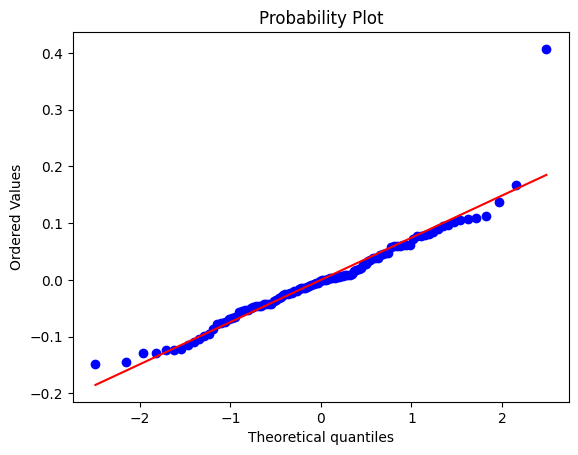

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Gráfico Q-Q para evaluar la normalidad de los residuos
residuals = model_significant4.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

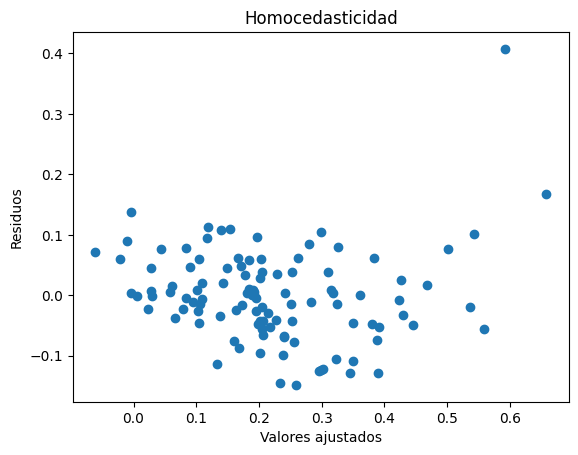

In [40]:
plt.scatter(model_significant4.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

In [41]:
from statsmodels.stats.diagnostic import het_breuschpagan
test = het_breuschpagan(residuals, model_significant4.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, test)))

{'LM Statistic': 14.65185812442088, 'LM-Test p-value': 0.011958225092758288, 'F-Statistic': 3.2019695275410807, 'F-Test p-value': 0.01000145170370903}


# Pruebas de supuestos con variables significativas sin función de enzimas(Modelo sin transformaciones significativas)

Prueba de normalidad

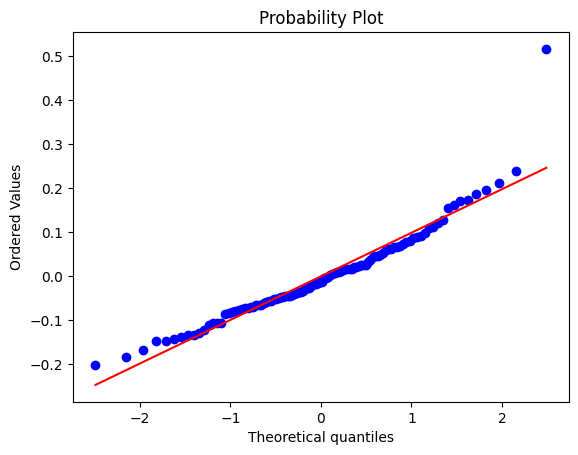

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Gráfico Q-Q para evaluar la normalidad de los residuos
residuals = model_significant3.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

En general se puede observar claramente que los datos siguen una distribución normal al estar la mayoría de los valores sobre la linea.

Prueba de homocedasticidad

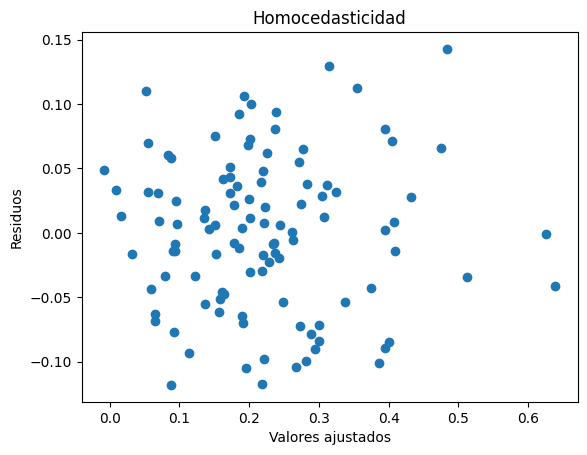

In [31]:
plt.scatter(model_significant3.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

En está gráfica podemos observar que los datos están bastante dispersos y no se puede llegar a notar ningún patrón significativo, por lo que esto nos llevaría a creer que el supuesto de homocedasticidad se cumple para este modelo, pero para estar más seguros aplicaremos una prueba de Breusch-Pagan para complementar las gráficas, esta prueba verifica la heterocedasticidad de manera más formal.

Prueba de Breusch-Pagan

In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan
test = het_breuschpagan(residuals, model_significant3.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, test)))


{'LM Statistic': 5.433006190320541, 'LM-Test p-value': 0.2456813526411656, 'F-Statistic': 1.363985666386482, 'F-Test p-value': 0.251624668449745}


El p-value tanto de la estadística LM como de la F es mayor a 0.05, lo que indica que no hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad. En otras palabras, no se detecta heterocedasticidad de manera significativa mi modelo sin incluir las transformaciones.

#Prueba de independencia

Durbin-Watson:                   1.658

Un valor del estadístico Durbin-Watson de 1.658 indica una posible autocorrelación en los residuos del modelo.

# Pruebas de supuestos (Modelo con transformaciones significativas)

Prueba de normalidad

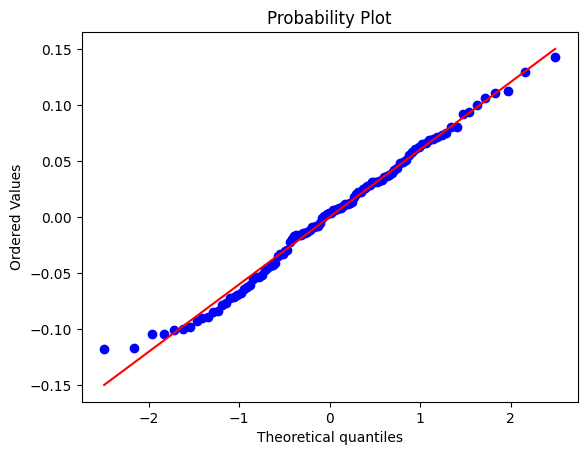

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Gráfico Q-Q para evaluar la normalidad de los residuos
residuals = modelo_significant2.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

En esta gráfica también se puede observar claramente como los datos del modelo siguen una distribución normal, ya que la mayoría están sobre la linea con pocas excepciones.

Prueba de Homocedasticidad

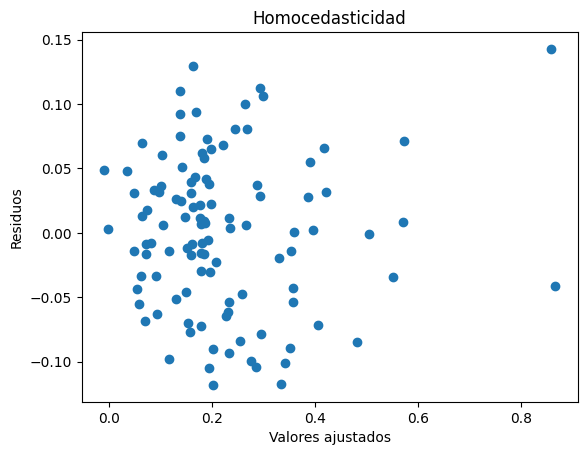

In [19]:
plt.scatter(modelo_significant2.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

En está gráfica al igual que en la que se hizo sin transformaciones podemos observar que los datos se ven dispersos y parecen estar repartidos aleatoriamente, además no se llega a notar ningún patrón a simple vista lo cuál sugiere que se cumple el supuesto de homocedasticidad.

Prueba de Breusch-Pagan

In [35]:
from statsmodels.stats.diagnostic import het_breuschpagan
test = het_breuschpagan(residuals, modelo_significant2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, test)))


{'LM Statistic': 45.66611224657642, 'LM-Test p-value': 6.945272011534714e-07, 'F-Statistic': 7.977253467768628, 'F-Test p-value': 9.027987519899654e-09}


Ambos p-valores (del LM y del F) son significativamente bajos, por lo que puedes rechazar la hipótesis nula de homocedasticidad. Esto indica que hay heterocedasticidad en el modelo, lo que significa que la varianza de los errores no es constante y podría afectar la validez de las inferencias obtenidas a partir del modelo de regresión.

#Prueba independencia

Durbin-Watson:                   2.014

Un valor de Durbin-Watson de 2.014 está muy cerca de 2, lo que sugiere que no hay una autocorrelación significativa en los residuos de tu modelo. Esto es una señal positiva, indicando que los residuos son aproximadamente independientes.




#Conclusiones

Al final el modelo en el que pude confirmar las 3 pruebas de supuestos fue en el modelo que hice usando las variables significativas sin las transformaciones y sin la función de enzima, me di cuenta que mi modelo con transformaciones me daba un valor más alto de R2 pero a costo de presentar autocorrelación significativa y FIV más alto para las variables.

Mi modelo de las variables significativas sin las transformaciones y sin la función de enzima presentó un valor de R2 algo bajo y FIV más bajos.

Entonces se hizo un intercambio de un menor R2 por menos autocorrelación y colinealidad en las variables para asi poder demostrar las 3 pruebas de supuestos.

Texto final

-
-
-
-
--
-
-
